In [ ]:
# Install pycaret and required libraries
!pip install pycaret

In [16]:
# Import libraries
from pycaret.classification import *


In [17]:
# Check if GPU is available
!nvidia-smi

Mon Nov 27 08:47:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [18]:
import pandas as pd

In [23]:
# Load your own CSV file
file_path = '/content/drive/MyDrive/employee_retention.csv'  # replace with the actual path to your CSV file
dataset = pd.read_csv(file_path)


In [24]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [25]:
dataset.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [30]:
num_features = dataset.drop(['Department', 'salary'], axis=1)
num_features = num_features.columns
num_features

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

In [36]:
# Customizing preprocessing steps (default train_test_split: 0.7 train, 0.3 test)
clf1 = setup(
    data=dataset,
    target='left',
    numeric_features=['satisfaction_level', 'last_evaluation', 'number_project',
                      'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years'],
    categorical_features=['Department', 'salary'],
    use_gpu=False
)

# Compare Models
compare_models()


,Description,Value
0,Session id,5086
1,Target,left
2,Target type,Binary
3,Original data shape,"(14999, 10)"
4,Transformed data shape,"(14999, 21)"
5,Transformed train set shape,"(10499, 21)"
6,Transformed test set shape,"(4500, 21)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9892,0.9921,0.9636,0.9909,0.9771,0.9700,0.9702,0.8970
xgboost,Extreme Gradient Boosting,0.9866,0.9941,0.9608,0.9825,0.9715,0.9627,0.9628,0.2050
lightgbm,Light Gradient Boosting Machine,0.9857,0.9944,0.9540,0.9856,0.9695,0.9602,0.9604,0.6350
et,Extra Trees Classifier,0.9849,0.9917,0.9540,0.9819,0.9677,0.9578,0.9580,1.0100
dt,Decision Tree Classifier,0.9784,0.9743,0.9664,0.9443,0.9552,0.9409,0.9411,0.1090
gbc,Gradient Boosting Classifier,0.9753,0.9888,0.9320,0.9632,0.9473,0.9312,0.9315,0.7810
ada,Ada Boost Classifier,0.9577,0.9830,0.9084,0.9139,0.9110,0.8832,0.8834,0.5170
knn,K Neighbors Classifier,0.9352,0.9686,0.9208,0.8275,0.8714,0.8283,0.8306,0.3160
qda,Quadratic Discriminant Analysis,0.8725,0.9155,0.8108,0.7092,0.7534,0.6684,0.6738,0.1670
lr,Logistic Regression,0.7821,0.8189,0.3156,0.5780,0.4080,0.2884,0.3083,1.1320


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=5086, verbose=0, warm_start=False)

In [37]:
# Example: Create a Random Forest model
rf_model = create_model('rf')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9886,0.9834,0.9600,0.9917,0.9756,0.9681,0.9684
1,0.9886,0.9961,0.9600,0.9917,0.9756,0.9681,0.9684
2,0.9933,0.9976,0.9760,0.9959,0.9859,0.9815,0.9816
3,0.9838,0.9820,0.9440,0.9874,0.9652,0.9547,0.9551
4,0.9952,0.9982,0.9840,0.9960,0.9899,0.9868,0.9869
5,0.9895,0.9932,0.9600,0.9959,0.9776,0.9708,0.9710
6,0.9905,0.9938,0.9680,0.9918,0.9798,0.9735,0.9737
7,0.9905,0.9932,0.9760,0.9839,0.9799,0.9737,0.9737
8,0.9857,0.9917,0.9520,0.9876,0.9695,0.9601,0.9604


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
# Example: Tune the Random Forest model
tuned_rf_model = tune_model(rf_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9724,0.9748,0.9320,0.9510,0.9414,0.9233,0.9234
1,0.9781,0.9855,0.9480,0.9595,0.9537,0.9394,0.9394
2,0.9800,0.9877,0.9480,0.9673,0.9576,0.9445,0.9446
3,0.9771,0.9745,0.9320,0.9708,0.9510,0.9361,0.9365
4,0.9819,0.9878,0.9480,0.9753,0.9615,0.9496,0.9498
5,0.9762,0.9843,0.9320,0.9668,0.9491,0.9336,0.9338
6,0.9657,0.9797,0.9320,0.9246,0.9283,0.9058,0.9058
7,0.9695,0.9833,0.9360,0.9360,0.9360,0.9160,0.9160
8,0.9629,0.9850,0.9320,0.9137,0.9228,0.8983,0.8984


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [52]:
## Show best params
print(tuned_rf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=5086, verbose=0, warm_start=False)


In [57]:
## Evaluate model
evaluate_model(tuned_rf_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

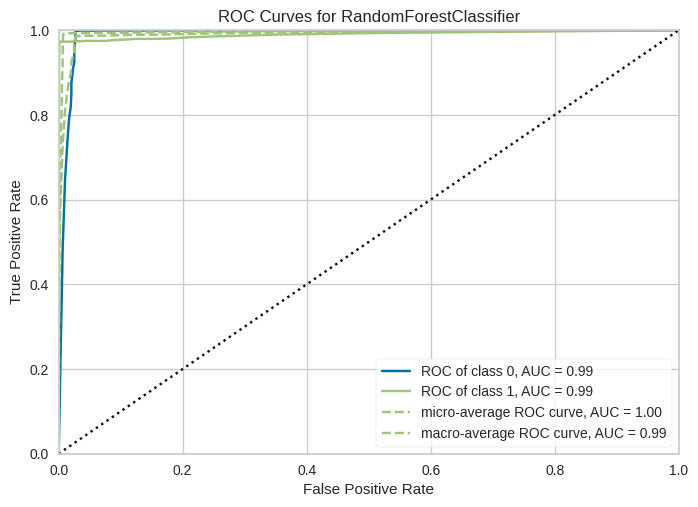

In [53]:
## Plot individual plots
plot_model(tuned_rf_model, plot = 'auc')

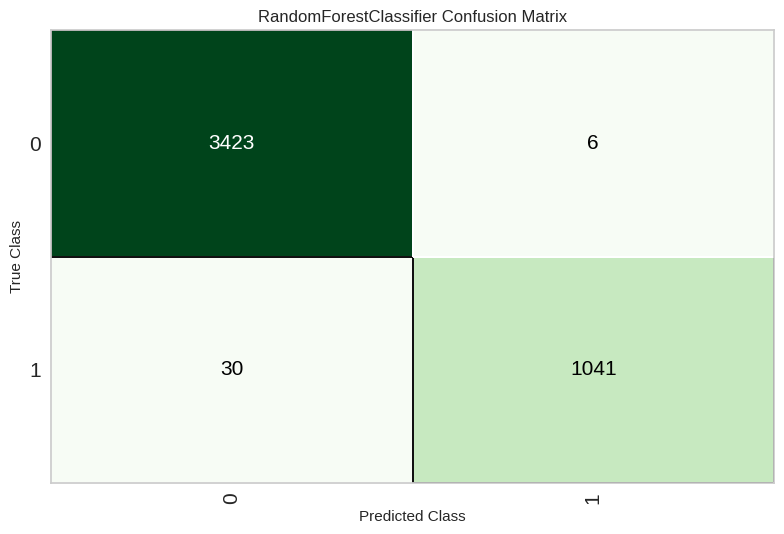

In [56]:
plot_model(tuned_rf_model, plot = 'confusion_matrix')

In [58]:
predict_model(tuned_rf_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9920,0.9903,0.9720,0.9943,0.9830,0.9778,0.9779


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left,prediction_label,prediction_score
14061,0.16,0.70,3,178,3,1,0,technical,low,0,0,0.97
961,0.73,0.83,5,270,5,1,0,support,medium,1,1,0.71
12821,0.19,0.58,4,173,5,0,0,accounting,medium,0,0,1.00
4510,0.80,0.65,3,135,3,0,1,marketing,low,0,0,0.93
10739,0.69,0.75,5,196,3,0,0,support,medium,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6005,0.51,0.86,4,196,2,0,0,support,low,0,0,1.00
682,0.11,0.87,7,278,4,0,0,sales,low,1,1,1.00
8830,0.52,0.63,4,136,2,0,0,support,medium,0,0,1.00
9304,0.51,0.69,3,135,3,0,0,IT,medium,0,0,1.00


In [ ]:
new_data = 'path/to/new_data'
predictions = predict_model(tuned_rf_model, data=new_data)
predictions.head()

In [65]:
## Saving the model
save_model(tuned_rf_model, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['satisfaction_level',
                                              'last_evaluation',
                                              'number_project',
                                              'average_montly_hours',
                                              'time_spend_company',
                                              'Work_accident',
                                              'promotion_last_5years'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               miss...
 

In [66]:
## Load the model
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['satisfaction_level',
                                             'last_evaluation',
                                             'number_project',
                                             'average_montly_hours',
                                             'time_spend_company',
                                             'Work_accident',
                                             'promotion_last_5years'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features...
                 RandomFo